# Interação e Concorrência
## Trabalho Prático - Grupo 13


Grupo:
- André Morandi A86912
- Ivo Lima A90214


In [66]:
# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile

# import visualization tools
from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_state_hinton

import matplotlib.pyplot as plt
%matplotlib inline

# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)

Sabendo que o número do nosso grupo é $N$ = $13$

Temos de de usar um $\textit{quantum algorithm}$ para encontrar $s$ numa lista não ordenada, tal que

$$ s = N \space mod \space 8 $$

In [67]:
N = 13
s = N % 8
s

5

Passando o valor de $s$ para binário, ficamos com:

In [68]:
w = bin(s)[2:]
w # winner

'101'

Portanto, como $5$ em binário é $101$, iremos precisar de preparar um circuito quântico de 3 qubits

In [69]:
x = 3
print('Número de qubits: ', x)

Número de qubits:  3


In [85]:
qr_x      = QuantumRegister(x, 'x')
cr        = ClassicalRegister(x, 'cr')
qc_Grover = QuantumCircuit(qr_x,cr) # circuito quântico

Portanto, iremos inicializar o estado $s$. Para tal criamos a seguinte função:

In [86]:
def init(qc_Grover):
    qc_Grover.h(0)
    qc_Grover.h(1)
    qc_Grover.h(2)

### Implementação do Oracle

Para computar um $\textit{quantum algorithm}$ baseado em um determinada função, podemos implementar uma espécie de $\textit{black box}$ da função. Passamos um $input$ $x$ e recebemos um $output$ $f(x)$.


Para resolver os problemas, podemos definir o oráculo da seguinte forma: marcaremos nossa solução (ou soluções) com uma fase negativa ($-1$). Desta forma, podemos usar o $\textit{Grover's algorithm}$ para resolver.

$$ U_w \lvert x \rangle \Rightarrow x \neq w \rightarrow \lvert x \rangle $$
$$ U_w \lvert x \rangle \Rightarrow x = w \rightarrow -\lvert x \rangle $$ 

Tomando o valor $w$ como sendo $101$ resultará na seguinte matriz:

$$ U_w =  \begin{bmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & −1 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\ \end{bmatrix}$$

In [72]:
def phase_oracle(qc_Grover, qr_x):
    qc_Grover.x(qr_x[0])
    qc_Grover.ccx(qr_x[0], qr_x[1], qr_x[2])
    qc_Grover.x(qr_x[2])

---------------------------------------------------------------------------------
De acordo com o que foi nos explicado durante as aulas da UC, a superposição colapsaria, sendo a probabilidade de cada uma das bases $\frac{1}{N} = \frac{1}{2^n}$ e o nossas chances de encontrar o valor $w$, $\textit{à priori}$, seria de $1$ em $2^n$.

O computador quântico utiliza a amplificação de amplitude para que possa aumentar a probailidade. Este processo amplifica a amplitude do $w$ enquanto diminiu a dos outros.

![title](grover_step1.jpg)


---------------------------------------------------------------------------------

### Diffuser

In [73]:
def diffuser(qc_Grover,qr_x):
    qc_Grover.h(qr_x[0])
    qc_Grover.x(qr_x[0])
    
    qc_Grover.h(qr_x[1])
    qc_Grover.x(qr_x[1])
    
    qc_Grover.h(qr_x[2])
    qc_Grover.x(qr_x[2])
    
    qc_Grover.h(qr_x[2])
    qc_Grover.ccx(qr_x[0],qr_x[1],qr_x[2])
    qc_Grover.h(qr_x[2])
    
    qc_Grover.h(qr_x[2])
    qc_Grover.x(qr_x[2])
    
    qc_Grover.h(qr_x[1])
    qc_Grover.x(qr_x[1])
    
    qc_Grover.h(qr_x[0])
    qc_Grover.x(qr_x[0])

O $qc\_Grover$ vai inicializer o quantum circuit

In [74]:
def init(qc_Grover):
    qc_Grover.h(0)
    qc_Grover.h(1)
    qc_Grover.h(2)

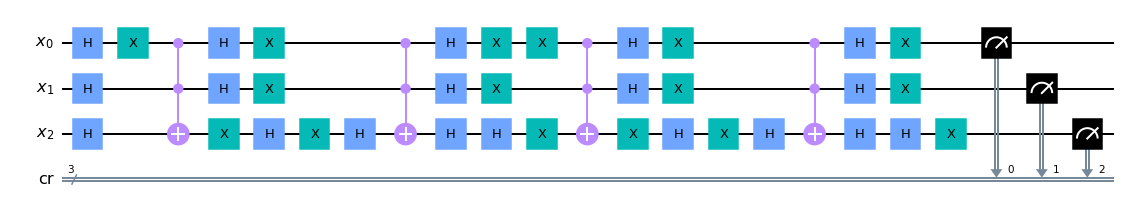

In [75]:
cr=ClassicalRegister(x,'cr')
qc_Grover= QuantumCircuit(qr_x,cr)

init(qc_Grover)

for t in range(2):
    # phase oracle
    phase_oracle(qc_Grover, qr_x)
    # diffuser
    diffuser(qc_Grover,qr_x)
    
qc_Grover.measure(qr_x,cr)

qc_Grover.draw(output='mpl')

Explicar resultado obtido

In [76]:
backend = Aer.get_backend("qasm_simulator")

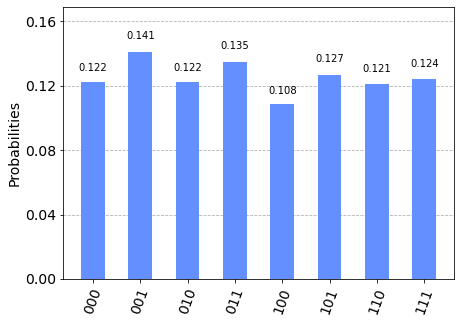

In [77]:
shots=1024
result = execute(qc_Grover, backend, shots=shots).result()
counts_sim = result.get_counts(qc_Grover)
plot_histogram(counts_sim)

In [78]:
qc_Grover.depth()

21

### Correr num quantum computer

In [79]:
provider = IBMQ.load_account()
provider.backends()

ibmqfactory.load_account:WARNING:2021-06-01 12:13:43,424: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [80]:
# Backend overview
import qiskit.tools.jupyter

%qiskit_backend_overview

In [81]:
from qiskit.tools.monitor import backend_overview, backend_monitor

backend_overview()

ibmq_manila                  ibmq_quito                  ibmq_belem
-----------                  ----------                  ----------
Num. Qubits:  5              Num. Qubits:  5             Num. Qubits:  5
Pending Jobs: 14             Pending Jobs: 0             Pending Jobs: 1
Least busy:   False          Least busy:   True          Least busy:   False
Operational:  True           Operational:  True          Operational:  True
Avg. T1:      152.1          Avg. T1:      88.9          Avg. T1:      83.6
Avg. T2:      64.4           Avg. T2:      80.4          Avg. T2:      76.4



ibmq_lima                    ibmq_santiago                ibmq_athens
---------                    -------------                -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 14             Pending Jobs: 11             Pending Jobs: 6
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  T

Explicar porque escolhemos a maquina

Juntando todos estes factores teremos a seguinte função:

In [82]:
# Generate the calibration circuits
qr = QuantumRegister(x)


# meas_calibs:
# list of quantum circuit objects containing the calibration circuits
# state_labels:
# calibration state labels
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1,2,3,4], qr=qr, circlabel='mcal')


IndexError: list index out of range

In [ ]:
state_labels